In [1]:
from cProfile import label

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [2]:
df = pd.read_csv('datasets/Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


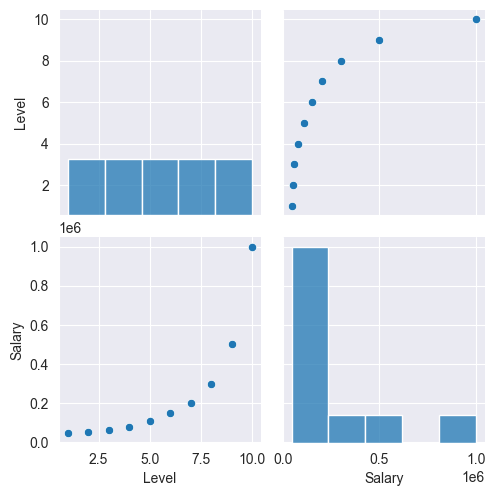

In [4]:
sns.pairplot(df)

level i salary se zavisni

In [5]:
x = pd.DataFrame(df['Level'])
y = df['Salary']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x_train = x_train.values.reshape(-1, 1)

In [8]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [9]:
poly_regression = PolynomialFeatures()

x_poly = poly_regression.fit_transform(x_train)

In [10]:
poly_regression.fit(x_poly, y_train)

PolynomialFeatures()

In [11]:
model = LinearRegression()

model.fit(x_poly, y_train)

LinearRegression()

In [12]:
x_test_poly = poly_regression.fit_transform(x_test) #ocekuva poveke features 

In [13]:
y_pred = model.predict(x_test_poly)

In [14]:
y_pred

array([  5379.19826652, 229211.80931744])

Birame najdobar model 

In [15]:
y_test

3    80000
0    45000
Name: Salary, dtype: int64

In [16]:
y_train = pd.DataFrame(y_train.values.reshape(-1,1))
y_test = pd.DataFrame(y_test.values.reshape(-1,1))

In [17]:
scaler = StandardScaler()

y_scale_train = scaler.fit_transform(y_train)
y_scale_test = scaler.transform(y_test)

In [18]:
train = []
test = []
for i in range(0, 10): #proagame niz 10 koeficienti - baram najdobar model, potocno koj koeficient bi zemale
    poly = PolynomialFeatures(degree=i) #For each degree, a new polynomial regression model is created, trained, and evaluated.
    x_poly = poly_regression.fit_transform(x_train, y_train)
    x_test_poly = poly_regression.fit_transform(x_test)
    
    model = LinearRegression() # celo vreme mora da se inicijaliziraat vrednostite za da ne se treniraat i na drugi modeli
    model.fit(x_poly, y_scale_train) #A linear regression model is trained on the transformed polynomial features (x_poly).
    y_pred = model.predict(x_test_poly) # The trained model is used to make predictions on the test set (polynomial-transformed).
    
    train.append(mean_squared_error(y_scale_train, model.predict(x_poly))) # MSE) measures how well the model predicts the data. Compares the true training values (y_train) with the model's predictions on training data.
    test.append(mean_squared_error(y_scale_test, y_pred))

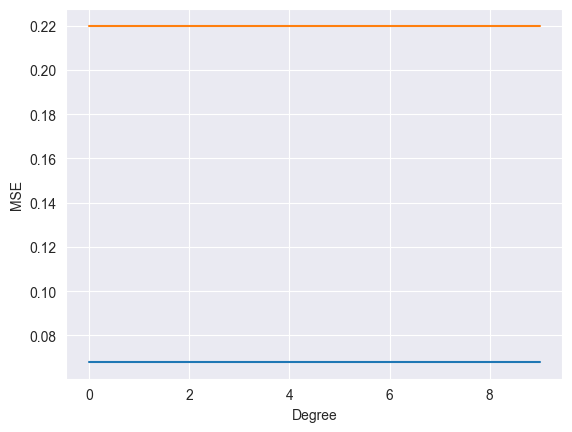

In [19]:
plt.plot(np.arange(0,10), train, label='Train')
plt.plot(np.arange(0,10), test, label='Test')
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

# LASSO and RIDGE - Regularization

In [20]:
model = KernelRidge(alpha=0.003, kernel='poly', degree=4, gamma=1, coef0=1) #define model

In [21]:
cv = RepeatedKFold(n_splits=6, n_repeats=5) #kolku splitovi sakame da imame - Cross Validation.  Define model evaluation method

In [22]:
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv) #evaluate model

In [23]:
scores = np.absolute(scores)
scores

array([148168.93192771,  12079.43800494,  43279.84762187,  61820.72846752,
       147970.14121805,  22286.65015214,  32228.27676613,  26429.7059342 ,
       162217.68502599,  14649.53263752, 147970.14121805,   3106.3484393 ,
       148168.93192771,  40293.70549654,  14649.53263752,  43279.84762187,
       147970.14121805,   3106.3484393 ,  11410.265196  ,  26895.67212516,
       162217.68502599,  14649.53263752, 147970.14121805,  61820.72846752,
       662854.94445879,  25969.07114903, 147970.14121805,  14649.53263752,
        22286.65015214,  24725.2533717 ])

In [24]:
scores.mean()

84769.85174706126

In [25]:
model.fit(x_train, y_train)

KernelRidge(alpha=0.003, degree=4, gamma=1, kernel='poly')

In [26]:
model.predict(x_test)

array([[ 85347.2933192],
       [169599.3046729]])

In [27]:
y_test

,0
0,80000
1,45000
